<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Certamen_1_Pauta_2Sem2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Certamen 1 - Análisis de Negocios**
La empresa Portal Domiciliario se dedica a hacer estudios de mercado asociados al rubro inmobiliario y cómo los factores geográficos, demográficos y socioeconómicos afectan el precio de las propiedas localizados en diversas zonas.
Se le ha pedido a usted, como Analista de Business Analytics que genere un modelo de predicción para estimar el precio de una zona residencial a partir de una serie de variables recopiladas en el Dataset "Housing". Este dataset contiene las siguientes variables:

* **latitude:** Latitud geográfica de la ubicación.
* **longitude:** Longitud geográfica de la ubicación.
* **housing_median_age:** Edad mediana de las viviendas en esa ubicación. Ayuda a estimar la antigüedad de las construcciones.
* **total_rooms:** Número total de habitaciones en todas las viviendas de un área específica. No se refiere a una vivienda individual, sino a una agregación de todas las viviendas en esa zona.
* **total_bedrooms:** Número total de dormitorios en todas las viviendas de la zona. Similar a total_rooms, este dato está agregado.
* **population:** Cantidad total de personas que viven en esa zona. Este dato indica la densidad o tamaño de la población en esa área geográfica.
* **households:** Número total de hogares en la zona. Un hogar puede estar compuesto por una sola persona o un grupo de personas que viven juntas.
* **median_income:** El ingreso medio (en miles de dólares) de los hogares en la zona. Este dato refleja la situación socioeconómica de la población en el área.
* **median_house_value:** Valor mediano de las casas en esa área. Este dato puede ser utilizado para entender el mercado inmobiliario y la asequibilidad de la vivienda en esa región.
* **ocean_proximity:** Indica la proximidad de la ubicación al océano, con valores como INLAND (interior), NEAR OCEAN (cercano al océano), NEAR BAY (cerca de una bahía), entre otros. Esta variable puede ser importante para evaluar el impacto de la ubicación en el valor de las propiedades.

A partir del set de datos y su pleno conocimiento en modelos de Machine Learning, se le pide lo siguiente:

# **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

##### **1.a)** Importe las librerías que correspondan, y lea el archivo con el cual realizará el modelo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/housing.csv')

##### **1.b)** ¿Cuántas filas y columnas tiene el set de datos?

In [ ]:
df.shape

(20640, 10)

##### **1.c)**  ¿Cuál es el nombre de cada una de las columnas?

In [ ]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

##### **1.d)**  ¿Cuántos valores distintos existen dentro de la columna asociada a la proximidad al océano? ¿Cuáles son sus valores?

In [ ]:
df.nunique()

,0
longitude,844
latitude,862
housing_median_age,52
total_rooms,5926
total_bedrooms,1923
population,3888
households,1815
median_income,12928
median_house_value,3842
ocean_proximity,5


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


##### **1.e)** Elimine del dataset los valores asociados a aquellas zonas que se encuentran en alguna Isla (ISLAND) o se encuentran a menos de 1 hora del oceáno (<1H OCEAN).

In [ ]:
df2 = df[df['ocean_proximity']!='ISLAND']
df3 = df2[df['ocean_proximity']!='<1H OCEAN']

<ipython-input-134-8deab6a3f26c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df['ocean_proximity']!='<1H OCEAN']


##### **1.f)** Aquellas áreas que se encuentran cerca del océano (NEAR OCEAN) o cerca de alguna bahía (NEAR BAY), reemplace sus valores llamándolos simplemente "Cerca". Luego para aquellas áreas que están en el interior (INLAND) denomínelas como "Lejos".

In [ ]:
df4 = df3.replace({'NEAR OCEAN': 'Cerca',
                   'NEAR BAY': 'Cerca',
                   'INLAND': 'Lejos'})

##### **1.f)** ¿Hay valores nulos? Si es así reemplácelos por el promedio.

In [ ]:
df = df4

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,105
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [ ]:
df4['ocean_proximity'].value_counts()

,count
ocean_proximity,
Lejos,6551
Cerca,4948


##### **1.g)** Elimine las columnas asociadas a Longitud y Latitud

In [ ]:
df = df.drop(['longitude', 'latitude'], axis=1)

##### **1.h)** Genere un gráfico de dispersión entre el valor mediano de las viviendas (eje x) y el ingreso mediano (eje y)

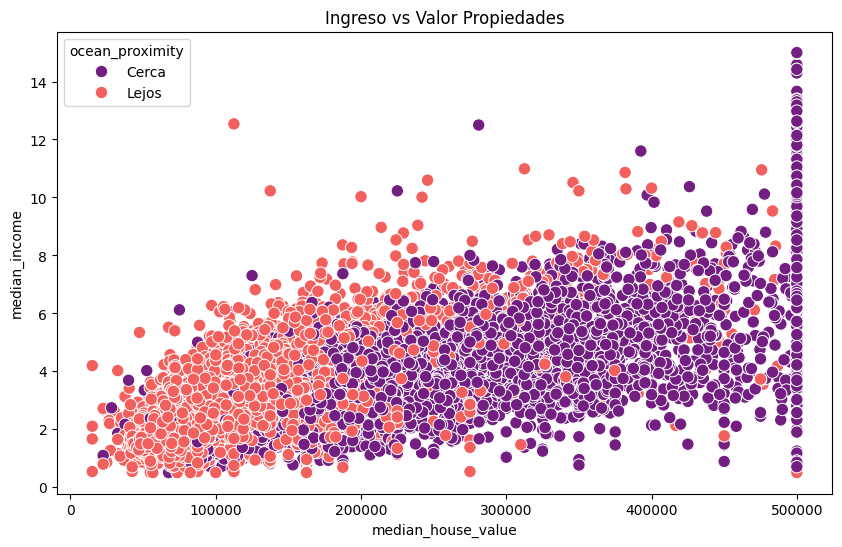

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_house_value', y='median_income', data=df, palette='magma', hue='ocean_proximity', s=80)
plt.title('Ingreso vs Valor Propiedades')
plt.show()

##### **1.h)** Elimine aquellas filas donde el ingreso mediano sea mayor o igual a 500.000

In [ ]:
df = df[df['median_house_value']<500000]

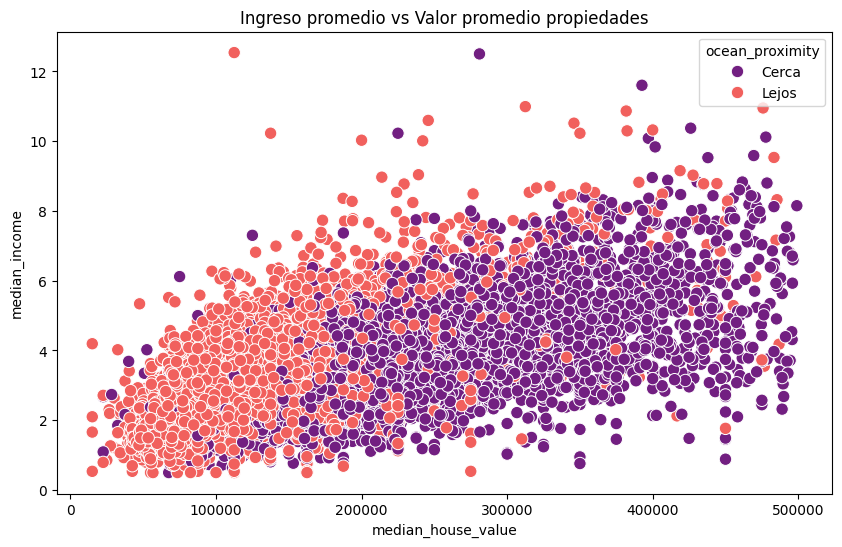

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_house_value', y='median_income', data=df, palette='magma', hue='ocean_proximity', s=80)
plt.title('Ingreso promedio vs Valor promedio propiedades')
plt.show()

##### **1.i)** Lleve a variables dummies las categorías asociadas a la proximidad del océano

In [ ]:
df_final = pd.get_dummies(df, drop_first=True).astype(int)

In [ ]:
df_final.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_Lejos
0,41,880,129,322,126,8,452600,0
1,21,7099,1106,2401,1138,8,358500,0
2,52,1467,190,496,177,7,352100,0
3,52,1274,235,558,219,5,341300,0
4,52,1627,280,565,259,3,342200,0


##### **1.j)** Genere una matriz de correlaciones con el dataframe ya depurado

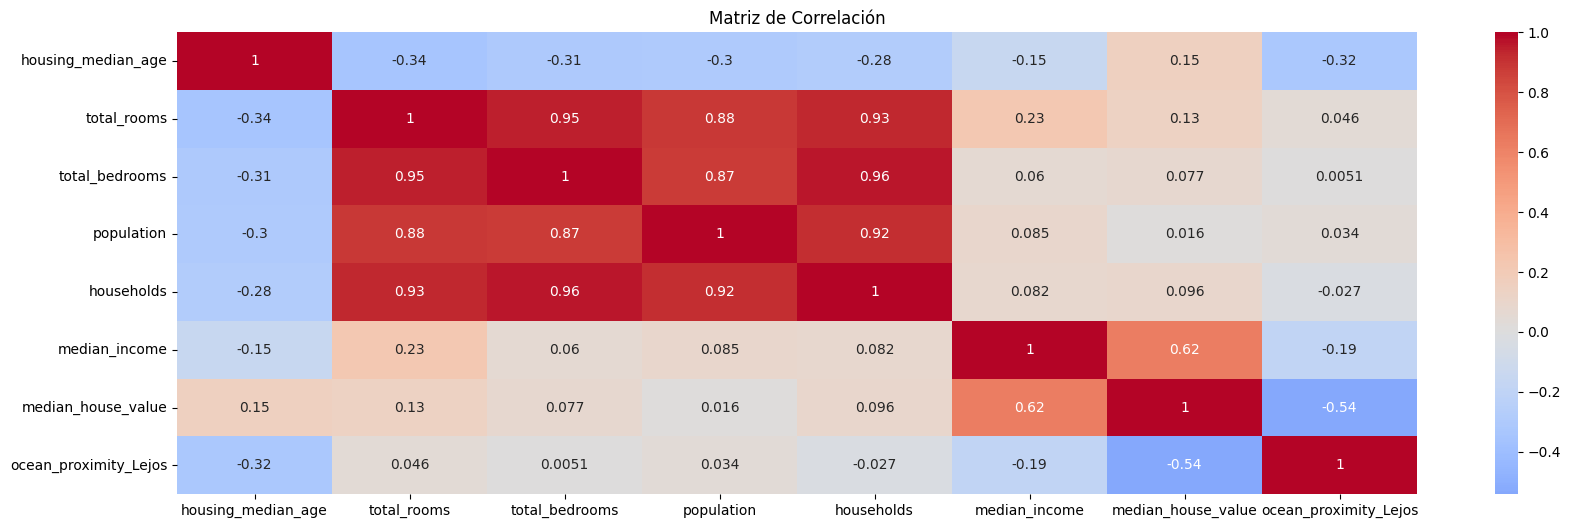

In [ ]:
correlation_matrix = df_final.corr()

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

# **2. REGRESIÓN**

##### **2.a)** Particione el dataframe en 85% de entrenamiento y 15% de testeo, indicando que la variable a predecir es el valor mediano de las propiedades. Considere una semilla igual a 500

In [ ]:
df_train = df_final.sample(frac=0.85,random_state=500) # Random State permite que procesos aleatorios sean replicables
df_test = df_final.drop(df_train.index)

In [ ]:
# X_train y X_test contienen todas las variables menos 'median_house_value'
x_train = df_train.drop(columns=['median_house_value'])
x_test = df_test.drop(columns=['median_house_value'])

# y_train e y_test contienen solo la variable 'median_house_value'
y_train = df_train['median_house_value']
y_test = df_test['median_house_value']

##### **2.b)** Genere una regresión lineal utilizando la librería estadística para obtener las variables significativa a partir de los P-Value ¿Qué variable(s) descarta del modelo?

In [ ]:
# Añadir la constante a X_train para incluir el intercepto
x_train_sm = sm.add_constant(x_train)

# Ajustar el modelo usando OLS de statsmodels
model_sm = sm.OLS(y_train, x_train_sm).fit()

# Mostrar el resumen con los p-valores
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2101.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:24:45   Log-Likelihood:            -1.1679e+05
No. Observations:                9391   AIC:                         2.336e+05
Df Residuals:                    9383   BIC:                         2.336e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   6.61e+

In [ ]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(x_train, y_train)

LinearRegression()

In [ ]:
df_coef = pd.DataFrame({
    'Variable': nombres_columnas,
    'Coeficiente': coeficientes
})

In [ ]:
df_coef

,Variable,Coeficiente
0,housing_median_age,960.359203
1,total_rooms,-0.960399
2,total_bedrooms,29.033022
3,population,-28.167355
4,households,68.799308
5,median_income,37414.599080
6,ocean_proximity_Lejos,-74310.722234


# **3. CLASIFICACIÓN**

##### **3.a)** Particione el dataframe en 75% de entrenamiento y 25% de testeo, indicando que la variable a predecir ahora es aquella asociada a la lejanía/cercanía del mar. Considere una semilla igual a 500

In [ ]:
list(df_final.columns)

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity_Lejos']

In [ ]:
df_train = df_final.sample(frac=0.75,random_state=500) # Random State permite que procesos aleatorios sean replicables
df_test = df_final.drop(df_train.index)

In [ ]:
# X_train y X_test contienen todas las variables menos 'ocean_proximity_Lejos'
x_train = df_train.drop(columns=['ocean_proximity_Lejos'])
x_test = df_test.drop(columns=['ocean_proximity_Lejos'])

# y_train e y_test contienen solo la variable 'ocean_proximity_Lejos'
y_train = df_train['ocean_proximity_Lejos']
y_test = df_test['ocean_proximity_Lejos']

##### **3.b)** Genere un modelo KNN considerando los 21 vecinos más cercanos, un tipo de distancia manhattan y un peso basado en las distancias.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir las distancias y tipos de pesos
distancias = ['euclidean', 'chebyshev', 'manhattan']
pesos = ['uniform', 'distance']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21, weights='distance', metric='manhattan')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

##### **3.c)** Genere una matriz de confusión asociada al modelo

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Graficamos matriz de confusion
matriz = confusion_matrix(y_test, y_pred)

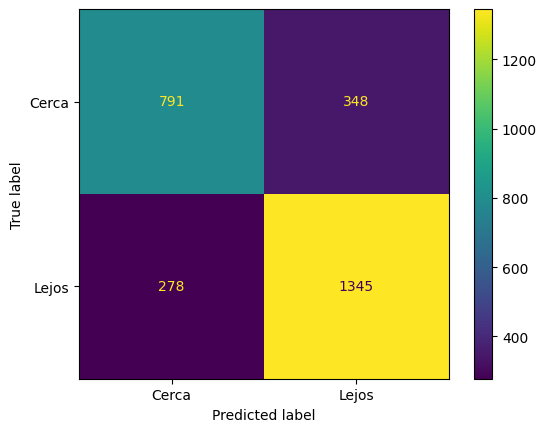

In [ ]:
class_names = ['Cerca', 'Lejos']
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

##### **3.d)** Indique cuáles son los valores asociados a Precisión, Sensibilidad, Recall y F-Score

In [ ]:
#Accuracy = TP+TN / P+N
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ',accuracy.round(2),'%')

#Precision = TP / TP+FP
precision = precision_score(y_test, y_pred)*100
print('Precision: ',precision.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall = recall_score(y_test, y_pred)*100
print('Sensitivity: ',recall.round(2),'%')


#F-Score = 2 * (Precision*Recall) / (Precision + Recall)
fscore = f1_score(y_test, y_pred)*100
print('F-Score: ',fscore.round(2),'%')

Accuracy:  77.34 %
Precision:  79.44 %
Sensitivity:  82.87 %
F-Score:  81.12 %
